**Exercise session 4**

In linear regression, we assume a linear model for *f(x)* in which *y* can be written as a weighted sum of
the elements of *x*. Given a vector of inputs *x = (x<sub>1</sub>, x<sub>2</sub>, . . . , x<sub>2</sub>)<sup>T</sup>*, we predict the output *y* as

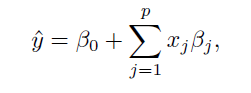

Linear regression is an example of a parametric model and assumes that *f(x)* is well approximated by a globally linear function.

Importing packages

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm 
import statsmodels.formula.api as smf 

In [56]:
np.random.seed(5) # Setting seed to ensure consistent results

* Create a vector *x1*, containing 100 observations drawn from a *N(0, 1)* distribution.

In [57]:
x1 = np.random.normal(size=100)

In [58]:
x2 = 0.5 * x1 + np.random.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + np.random.normal(size=100)

Naturally, vector *y* has length 100, since it is a linear combination of 2 vectors of length 100.

* Write down the linear model form

*Y*=$\beta$<sub>0</sub>+$\beta$<sub>1</sub>X<sub>1</sub>+$\beta$<sub>2</sub>X<sub>2</sub>+ϵ 

* Fit a least squares regression to predict *y* using *x1* and *x2*.

In [59]:
# Define data
df = pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})

# Create model
mod = smf.ols(formula='y ~ x1 + x2', data=df)

# Fit model
res = mod.fit()

# Print results
print (res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     239.3
Date:                Tue, 18 Oct 2022   Prob (F-statistic):           3.09e-38
Time:                        11:30:24   Log-Likelihood:                -131.54
No. Observations:                 100   AIC:                             269.1
Df Residuals:                      97   BIC:                             276.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8819      0.092     20.457      0.0

According to the results we have estimated coeficiants as below,

$\beta$<sub>0</sub>=1.8158,
$\beta$<sub>1</sub>=2.0758,
$\beta$<sub>2</sub>=0.758

* Fit least squares regression to predict *y* using only *x2*.

In [60]:
df = pd.DataFrame({'x2':x2})

# Create model
mod = smf.ols(formula='y ~ x2', data=df)

# Fit model
res = mod.fit()

# Print results
print (res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     403.3
Date:                Tue, 18 Oct 2022   Prob (F-statistic):           1.64e-36
Time:                        11:30:24   Log-Likelihood:                -138.96
No. Observations:                 100   AIC:                             281.9
Df Residuals:                      98   BIC:                             287.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8847      0.099     19.120      0.0

**K-Nearest neighbour (KNN) regression**

Given $x$, it predicts $y$ as

<center><font size="5">$\hat{y}(x) = \frac{1}{k}\sum_{x_i\epsilon{N_k}(x)}{y_i}(x_i)$</font></center>

where ${N_k}(x)$ is the set of $k$ nearest neighbors to $x$ in the training set.

In simple terms: The KNN algorithm uses ‘feature similarity’ to predict the values of any new data points. This means that the new point is assigned a value based on how closely it resembles the points in the training set.

*k*-nearest neighbors is a non-parametric model and assumes *f(x)* is well approximated by a locally constant function. It doesn't make explicit assumptions about the form of function *f(x)*, but describe it in terms of local behavior of the training data in the region near *x*.

In [61]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head(100)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
95,FDU04,NaN,Low Fat,0.009715,Frozen Foods,120.0414,OUT019,1985,Small,Tier 1,Grocery Store,487.3656
96,FDF41,12.15,Low Fat,0.131384,Frozen Foods,246.0460,OUT049,1999,Medium,Tier 1,Supermarket Type1,1231.7300
97,FDB56,8.75,Regular,0.074613,Fruits and Vegetables,187.4556,OUT035,2004,Small,Tier 2,Supermarket Type1,3755.1120
98,NCP18,NaN,Low Fat,0.028460,Household,149.9708,OUT027,1985,Medium,Tier 3,Supermarket Type3,4363.6532


* Impute missing values

In real world, often there are missing data due to failure to record and data corruption.
Therefore, it is a good practice to identify and replace missing values to avoid problems been caused on statistical learning algorithms.

In [62]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [63]:
mean = df['Item_Weight'].mean() #imputing item_weight with mean
df['Item_Weight'].fillna(mean, inplace =True)

mode = df['Outlet_Size'].mode() #imputing outlet size with mode

print(mode)

df['Outlet_Size'].fillna(mode[0], inplace =True)
df.head(100)

0    Medium
Name: Outlet_Size, dtype: object


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
95,FDU04,12.857645,Low Fat,0.009715,Frozen Foods,120.0414,OUT019,1985,Small,Tier 1,Grocery Store,487.3656
96,FDF41,12.150000,Low Fat,0.131384,Frozen Foods,246.0460,OUT049,1999,Medium,Tier 1,Supermarket Type1,1231.7300
97,FDB56,8.750000,Regular,0.074613,Fruits and Vegetables,187.4556,OUT035,2004,Small,Tier 2,Supermarket Type1,3755.1120
98,NCP18,12.857645,Low Fat,0.028460,Household,149.9708,OUT027,1985,Medium,Tier 3,Supermarket Type3,4363.6532


In [64]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

* Change categorical variables to dummy variables

Variables can be classified into 1) Categorical 2) Quantitative

The conversion leads to the formation of the two-dimensional binary matrix where each column represents a particular category.

The important thing to notice is that each categorical column is replaced by the number of unique categories it has in the data set containing dummy variables.

In [65]:
df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)
df = pd.get_dummies(df)

In [66]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


* Split Test and Train data set

In [67]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(df, test_size = 0.3)

x_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']

x_test = test.drop('Item_Outlet_Sales', axis = 1)
y_test = test['Item_Outlet_Sales']

* Scale the features

A technique to standardize the independent features present in the data in a fixed range. 
Without feature scaling, a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values,  regardless of the unit of the values.

In [68]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

* Error rate for different $k$ values

Root Mean Square Error (RMSE) can measure the error of a model in predicting quantitative data.

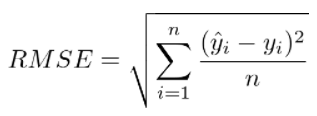

In [69]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

* GridsearchCV for deciding optimum $k$ value

In [70]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_

{'n_neighbors': 8}

* Make predictions on the test dataset

In [71]:
#reading test file
test = pd.read_csv('Test.csv')

#preprocessing test dataset
test.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)
test['Item_Weight'].fillna(mean, inplace =True)
test = pd.get_dummies(test)
test_scaled = scaler.fit_transform(test)
test = pd.DataFrame(test_scaled)

#predicting on the test set
model = neighbors.KNeighborsRegressor(n_neighbors = 8)
model.fit(x_train, y_train)  #fit the model
predict = model.predict(test)

In [72]:
predict

array([2769.478325, 1322.195575,  374.429275, ..., 1754.133325,
       3505.27055 , 1539.16315 ])